## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

In [3]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())
display(df_train.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
## Convert 'Survived' data from discrete to categorical 'Survived_cate'
df_train['Survived_cate'] = df_train['Survived'].apply(lambda x: 'Y' if x == True else 'N')
df_train['Survived_cate'].head(5)

0    N
1    Y
2    Y
3    Y
4    N
Name: Survived_cate, dtype: object

###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


In [11]:
# continuous data vs categorical data
aov = pg.anova(dv='Age', between='Survived_cate', data=df_train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [13]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Negligible'

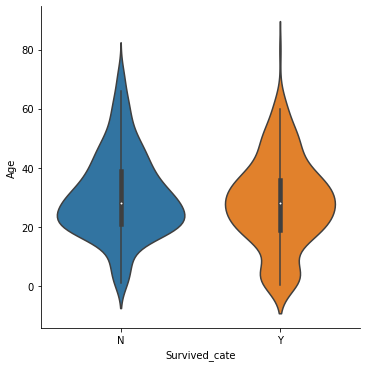

In [16]:
g = sns.catplot(x = 'Survived_cate', y = 'Age', data = df_train, kind = 'violin')

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [17]:
# categorical vs categorical
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
contTable

Survived_cate,N,Y
Sex,,
female,81,233
male,468,109


In [21]:
df = min(contTable.shape[0], contTable.shape[1]) - 1
print('degree of freedom =', df)
crosstab, res = researchpy.crosstab(df_train['Sex'], df_train['Survived_cate'], test='chi-square')
print(crosstab)
print(res)
print("Cramer's value is",res.loc[2,'results'])
print('since df = 1 and 0.5 < V, level of correlation is high')

degree of freedom = 1
              Survived_cate          
Survived_cate             N    Y  All
Sex                                  
female                   81  233  314
male                    468  109  577
All                     549  342  891
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434
Cramer's value is 0.5434
since df = 1 and 0.5 < V, level of correlation is high


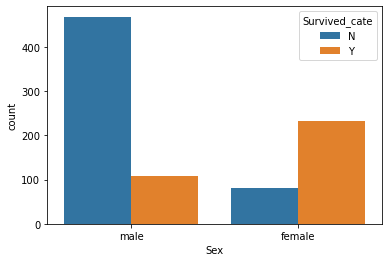

In [22]:
g = sns.countplot(x = 'Sex', hue = 'Survived_cate', data = df_train)

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

In [30]:
# continuous vs continuous
# drop missing data in column 'Age' and copy to a new dataframe
df_train_mod = df_train.dropna(subset=['Age'])
df_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    714 non-null    int64  
 1   Survived       714 non-null    int64  
 2   Pclass         714 non-null    int64  
 3   Name           714 non-null    object 
 4   Sex            714 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          714 non-null    int64  
 7   Parch          714 non-null    int64  
 8   Ticket         714 non-null    object 
 9   Fare           714 non-null    float64
 10  Cabin          185 non-null    object 
 11  Embarked       712 non-null    object 
 12  Survived_cate  714 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 78.1+ KB


In [31]:
#calculate Pearson coefficient r
corr, p_value =stats.pearsonr(df_train_mod['Age'], df_train_mod['Fare'])
print(corr, p_value)

0.0960666917690389 0.010216277504442105


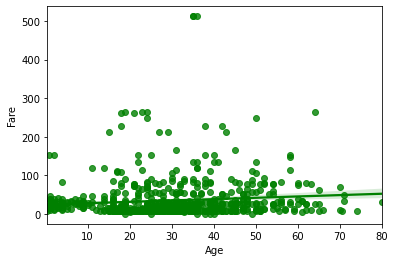

In [32]:
g = sns.regplot(x="Age", y="Fare", color="g",data=df_train_mod)